In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# import scipy as sc

In [2]:
path = "../images/jocelyn-morales-mGmhfO2CVV8-unsplash (1).jpg"
image_data = cv.imread(path, 0)
# image_data = cv.cvtColor(src= image_data, code=cv.COLOR_BGR2GRAY)
image = cv.resize(image_data, (400, 400))

In [3]:
"""
Convolution function
"""
kernel1 = np.array([[-1, 0, 1], 
                    [-2, 0, 2],
                    [-1, 0, 1]])

kernel2 = np.array([[1, 2, 1], 
                    [0, 0, 0], 
                    [-1, -2, -1]])

# padding zero not to lost the image size

def convolve2D(image_data, kernel, padding = 0, strides = 1):
    padding_width = kernel.shape[0] // 2   # in our case 3x3 it will be 1px in all sides

    # to add the padding to our image
    x = image_data.shape[0] + padding_width * 2
    y = image_data.shape[1] + padding_width * 2

    # array = np.array([padding] * (x * y))
    # new_arr = array.reshape(x, y)
    padding_img = np.zeros((x, y)) 

    # keep the pixel wide padding on all sides, but change the other values to be the same as img
    padding_img[padding_width:-padding_width, padding_width:-padding_width] = image_data


        # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(image_data.shape[0], image_data.shape[1]))
    
    # Iterate over the rows
    for i in range(image_data.shape[0]):
        # Iterate over the columns
        for j in range(image_data.shape[0]):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = padding_img[i:i+k, j:j+k]  # => img[i:i+k][j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img





In [4]:
# link for 2d convolve implementation function
# https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381#:~:text=2D%20Convolutions%20are%20instrumental%20when,to%20create%20an%20output%20image.
# https://towardsdatascience.com/tensorflow-for-computer-vision-how-to-implement-convolutions-from-scratch-in-python-609158c24f82

# link for implementation for sobel
# https://coderspacket.com/sobel-edge-detection-from-scratch-using-python

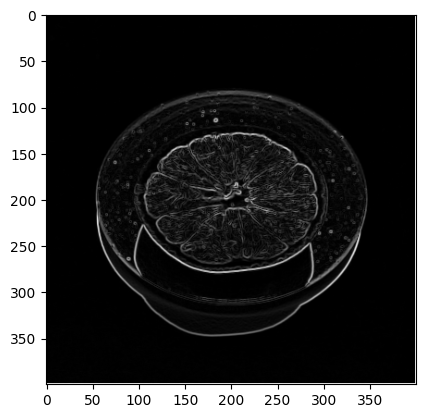

In [5]:
""""
Sobel Function for edge detection:
    Edge detection is an application for the convolution so we are using sobel filter to edge dectect.
    Sobel filter consists of two kernels and the kernels are 3x3 Matrices.
    We convolve each kernel with the image.
    Then we will combined the results
    Gx => the result of convolving kernel1 with image.
    Gy => the result of convolving kernel2 with image.
    by using square root of Gx ** 2 + Gy ** 2, you will get the magnitude of the edge and combine.

"""

def sobel(image_data, horizontal = kernel1, vertical = kernel2):
    # Gx = sc.signal.convolve2d(horizontal, image_data)
    G_x = convolve2D(image_data, horizontal, padding = 0, strides = 1)
    G_y = convolve2D(image_data, vertical, padding = 0, strides = 1)
    # Gy = sc.signal.convolve2d(vertical, image_data)
    G_combined = np.sqrt(np.square(G_x) + np.square(G_y))
    G_combined *= 255.0 / G_combined.max() # normalize to be between 0 and 255
    
    plt.imshow(G_combined, cmap='gray')

sobel(image)

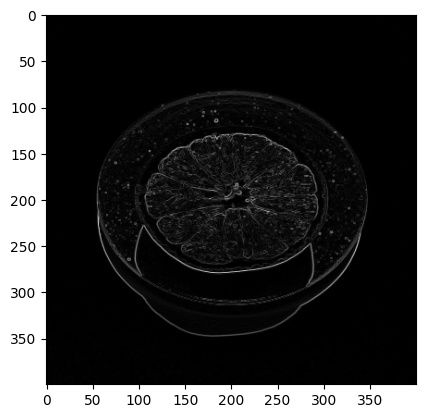

In [33]:
"""
Roberts function:
    the input to the operator is a grayscale image, as is the output.
    we will convolve the image with the kernels.
    kernels of the robert are 2x2.
    gradient mag (G) can be optained like the soble by taking square root of G_x_square + G_y_square

"""
robert_kernal1 = np.array([[1, 0], 
                           [0, -1]])

robert_kernal2 = np.array([[0, 1], 
                           [-1, 0]])

def robert(image_data, horizontal = robert_kernal1, vertical = robert_kernal2):
    G_x = convolve2D(image_data, horizontal, padding = 0, strides = 1)
    G_y = convolve2D(image_data, vertical, padding = 0, strides = 1)
    G_combined = np.sqrt(np.square(G_x) + np.square(G_y))
    
    plt.imshow(G_combined, cmap='gray')

robert(image)